<a href="https://colab.research.google.com/github/purusachdeva/Parameter-Optimisation/blob/main/Parameter_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install ucimlrepo
# !pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets

# metadata
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata)

# variable information
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables)


{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [ ]:
print("First few rows of features (X):")
print(X.head())

First few rows of features (X):
   RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4       2.0     1.0    35.9   103.0     2.0    81.0  10.92


In [ ]:
print("\nFirst few rows of targets (y):")
print(y.head())


First few rows of targets (y):
  age_group
0     Adult
1     Adult
2     Adult
3     Adult
4     Adult


In [ ]:
print(y)

     age_group
0        Adult
1        Adult
2        Adult
3        Adult
4        Adult
...        ...
2273     Adult
2274     Adult
2275     Adult
2276     Adult
2277     Adult

[2278 rows x 1 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)

In [ ]:
# kernels = ['linear', 'poly', 'sigmoid', 'rbf', 'anovadot']
kernels=['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}

In [ ]:
def evaluate_svm(kernel, nu, tol):
  kernel_name = kernels[int(kernel)]
  model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [ ]:
# results = []
# optimizers = []
# for sample in range(1):
#   optimizer = BayesianOptimization(evaluate_svm, pbounds)
#   optimizer.maximize(init_points=5, n_iter=20)
#   best_params = optimizer.max['params']
#   best_accuracy = optimizer.max['target']
#   results.append((sample, best_accuracy, best_params))
#   optimizers.append(optimizer)

results = []
optimizers = []
targets = []  # Store target values (accuracy scores)
iteration_counts = []  # Store iteration counts

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))
    optimizers.append(optimizer)

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])

|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.1886    | 1.855     | 0.05822   | 0.09863   |
| 2         | 0.7047    | 0.6066    | 0.03805   | 0.4972    |
| 3         | 0.1827    | 0.4045    | 0.03621   | 0.6783    |
| 4         | 0.1725    | 1.502     | 0.09158   | 0.4427    |
| 5         | 0.6871    | 0.3965    | 0.04635   | 0.07028   |
| 6         | 0.3918    | 0.7317    | 0.08121   | 0.3474    |
| 7         | 0.7032    | 0.5895    | 0.05681   | 0.5078    |
| 8         | 0.5249    | 0.3943    | 0.04382   | 0.07693   |
| 9         | 0.6447    | 0.6089    | 0.05452   | 0.5185    |
| 10        | 0.4678    | 0.2426    | 0.05838   | 0.5626    |
| 11        | 0.3348    | 0.3916    | 0.05845   | 0.05214   |
| 12        | 0.5409    | 0.5896    | 0.04026   | 0.5114    |
| 13        | 0.6155    | 0.3904    | 0.04436   | 0.07376   |
| 14        | 0.2749    | 0.6215    | 0.03419   | 0.4965    |
| 15    

In [ ]:
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.789474  {'kernel': 0.8853378432139474, 'nu': 0.0142678...
1       1       0.837719  {'kernel': 0.012703973896301735, 'nu': 0.01884...
2       2       0.796784  {'kernel': 0.13357808302673346, 'nu': 0.016482...
3       3       0.830409  {'kernel': 0.6830212441618986, 'nu': 0.0156535...
4       4       0.823099  {'kernel': 0.41161742924236466, 'nu': 0.054557...
5       5       0.833333  {'kernel': 0.5370807795519168, 'nu': 0.0921194...
6       6       0.845029  {'kernel': 0.8677161113616927, 'nu': 0.0733221...
7       7       0.752924  {'kernel': 0.01657422979557821, 'nu': 0.021860...
8       8       0.811404  {'kernel': 0.13281602057312591, 'nu': 0.010987...
9       9       0.837719  {'kernel': 0.8492611725456793, 'nu': 0.0996894...


In [ ]:
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"Sample with maximum accuracy: {max_accuracy_sample['Sample']}")

Sample with maximum accuracy: 6


6


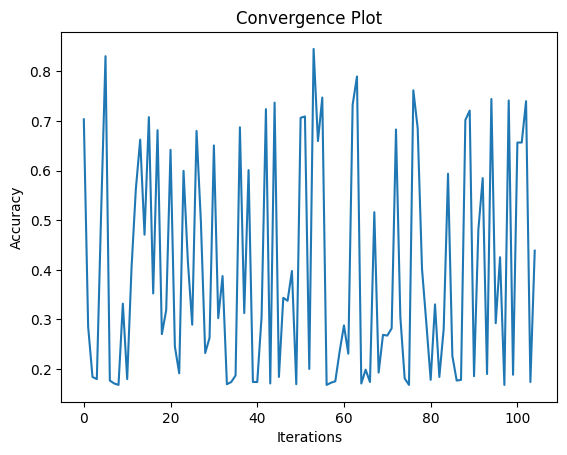

In [ ]:
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
print(max_accuracy_optimizer_idx)
iterations = range(iteration_counts[max_accuracy_optimizer_idx])
plt.plot(iterations, targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot')
plt.show()